In [1]:
from other_methods_implemenations  import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_data(n, m = 20):
    df = pd.DataFrame(np.random.randn(n, m)).add_prefix('feat_')
    df['marg'] = (np.random.randn(n) *1 + df.iloc[:,-1:].T.values[0] *99) / 100
    return df*100

c:\Users\mikol\Desktop\Master thesis\mcut_feature_selection\mcut_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [72]:
# res = pd.Series()
df = create_data(1000)
mcut_feature_selection(df, 3, 'marg', np.mean, 7, mcut, 0, 100, 5)
# for n in range(1000, 100000, 1000):
for n in range(1000, 100000, 1000):
    for i in range(10):
        df = create_data(n)
        start = pd.Timestamp.now(tz = 'cet')
        feats = mcut_feature_selection(df, 3, 'marg', np.mean, 5, mcut, 0, 100, 5)
        res.loc[f'{n}_{i}'] = ((pd.Timestamp.now(tz = 'cet') - start).total_seconds(), len(feats), feats)
    

Max condition is abs(mono)>0.55
Number of features is 20
I saved it as 'results'.
I saved importantn features due to the Lasso regression as an attribute 'important_features'.


In [6]:
# res.to_pickle('experiment_1_results.pkl')
res = pd.read_pickle('experiment_1_results.pkl')

In [7]:
res.index = [int(i.split('_')[0]) for i in res.index]

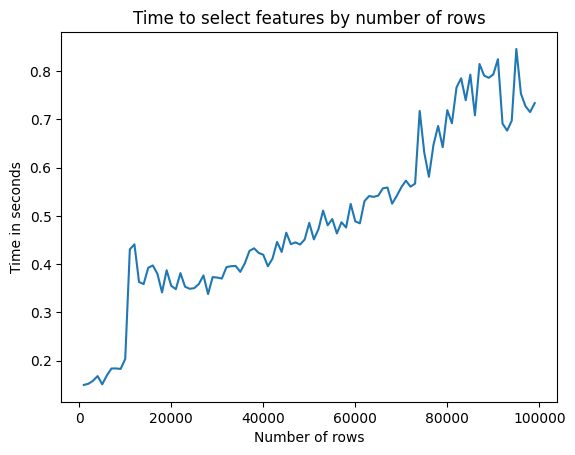

In [13]:
res.groupby(res.index).apply(lambda x: x.str[0].median()).rolling(1).mean().plot()
plt.title('Time to select features by number of rows')
plt.xlabel('Number of rows')
plt.ylabel('Time in seconds')

plt.savefig('charts\exp1.png', format='png')
